In [5]:
from sklearn.datasets import fetch_openml

In [9]:
df = fetch_openml('mnist_784', version=1, as_frame=False)

In [10]:
df

{'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]),
 'target': array(['5', '0', '4', ..., '4', '5', '6'], dtype=object),
 'frame': None,
 'categories': {'class': ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']},
 'feature_names': ['pixel1',
  'pixel2',
  'pixel3',
  'pixel4',
  'pixel5',
  'pixel6',
  'pixel7',
  'pixel8',
  'pixel9',
  'pixel10',
  'pixel11',
  'pixel12',
  'pixel13',
  'pixel14',
  'pixel15',
  'pixel16',
  'pixel17',
  'pixel18',
  'pixel19',
  'pixel20',
  'pixel21',
  'pixel22',
  'pixel23',
  'pixel24',
  'pixel25',
  'pixel26',
  'pixel27',
  'pixel28',
  'pixel29',
  'pixel30',
  'pixel31',
  'pixel32',
  'pixel33',
  'pixel34',
  'pixel35',
  'pixel36',
  'pixel37',
  'pixel38',
  'pixel39',
  'pixel40',
  'pixel41',
  'pixel42',
  'pixel43',
  'pixel44',
  'pixel45',
  'pixel46',
  'pixel47

In [11]:
X = df.data
y = df.target

In [14]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [15]:
X = (X - X.min()) / (X.max() - X.min())

In [16]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [17]:
from sklearn.decomposition import PCA

In [18]:
pca = PCA(
    n_components=0.95
)

In [19]:
pca.fit(X)

PCA(n_components=0.95)

In [20]:
X_pca = pca.transform(X)

In [23]:
X_pca.shape

(70000, 154)

In [24]:
X.shape

(70000, 784)

In [25]:
from sklearn.cluster import KMeans

In [32]:
kmeans = KMeans(n_clusters=10, n_init=10)
cluster_labels = kmeans.fit_predict(X_pca)

In [27]:
import matplotlib.pyplot as plt

In [33]:
y

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

In [34]:
cluster_labels

array([3, 6, 0, ..., 5, 2, 7], dtype=int32)

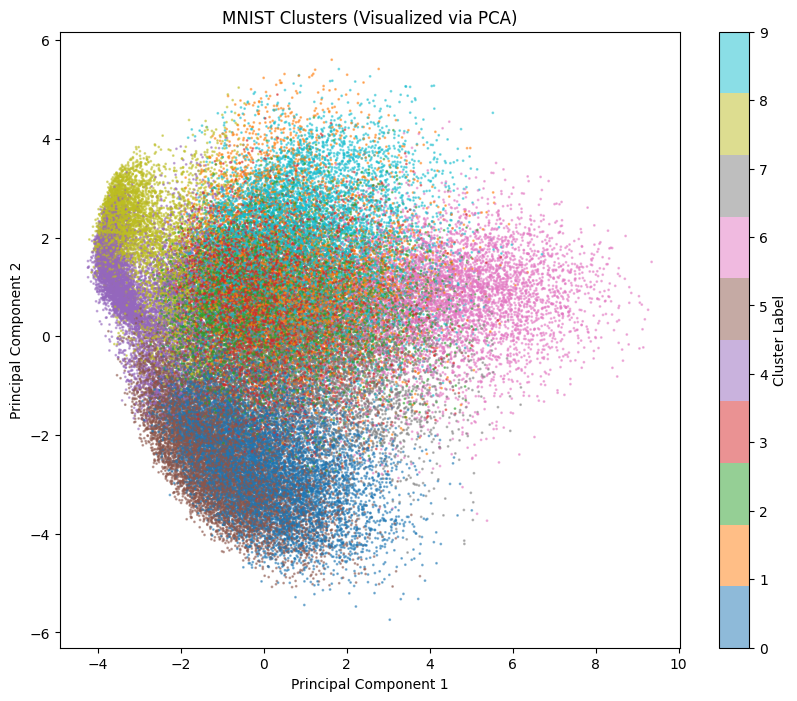

In [35]:
plt.figure(figsize=(10, 8))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, cmap='tab10', s=1, alpha=0.5)
plt.colorbar(label='Cluster Label')
plt.title('MNIST Clusters (Visualized via PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [36]:
ct = pd.crosstab(y, cluster_labels, rownames=['Actual Digit'], colnames=['Cluster ID'])
print(ct)

Cluster ID       0     1     2     3     4     5     6     7     8     9
Actual Digit                                                            
0               43     9  1260    74     3     7  5041   173     4   289
1                6    10     7     9  4293    10     0     7  3527     8
2              215  4864   240   206   428    78    56   151   433   319
3              187   207   506  1034   458    46    21    33    53  4596
4             3734    30   255    19   182  2190     9   170   235     0
5              428     7  1846  1129   167   214    59    70   266  2127
6               67    57  1925    17   206     4    73  4443    45    39
7             2086    53    12    20   377  4402    21     4   313     5
8              208    52   339  4119   335   186    37    54   318  1177
9             3456    19    31    88   267  2852    50    16    93    86
